# Tutorial 4

This contains my attempt at Tutorial4.

This tutorial follows a lecture on Linear Discriminant Functions.

# Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Scaling

In [19]:
# online copy
df = pd.read_csv('http://pogo.software/me4ml/tensile_strength.csv')
df.head()

,Temperature (deg C),Ultimate tensile strength (Pa)
0,184.122816,1.970784e+08
1,177.837350,2.206379e+08
2,192.457401,1.939733e+08
3,193.875471,2.214973e+08
4,198.058288,2.530966e+08


In [20]:
mus = []
sigmas = []
for i in df:
    mus.append(df[i].mean())
    sigmas.append(df[i].std())
    
print(mus)
print(sigmas)

[200.65657923921168, 251960970.64323515]
[9.810044584237978, 29235635.038106047]


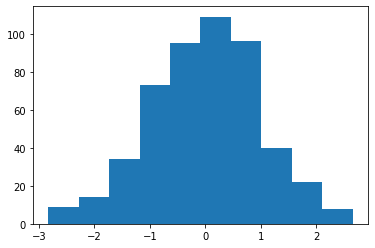

In [21]:
# scale paramters
for j,i in enumerate(df):
    df[i] = (df[i] - mus[j])/sigmas[j]
    
fig, ax=plt.subplots()
plt.hist(df['Ultimate tensile strength (Pa)'])
plt.show()

In [23]:
# save the propergies
params = np.asarray([mus, sigmas])
np.savetxt('../Data/scaled_params.txt',params)

In [28]:
# load back the parameters
loadedScales = np.loadtxt('../Data/scaled_params.txt')
loadedScales

array([[2.00656579e+02, 2.51960971e+08],
       [9.81004458e+00, 2.92356350e+07]])

# 2 Linear Discriminant Functions - Plotting


[-1  3]
[[0.         0.00502513 0.01005025 ... 0.98994975 0.99497487 1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]


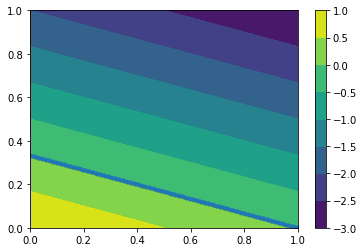

In [116]:
def LDF(X,w,w_0):
    """ calculates the g function: g = w . x + w_0"""
    
    
    g = np.matmul(w,X) + w_0
    return g
x1 = np.linspace(0,1,200)
x2 = np.linspace(0,1,200)
x1_grid, x2_grid = np.meshgrid(x1,x2)
Xgrid = np.array([x1_grid, x2_grid]).reshape(2, 40000)

g = LDF(Xgrid, [-1,-3],1).reshape(-200,200)

plt.contourf(x1,x2,g)
plt.colorbar()

plt.plot(x1,(1-x1)/3,'.')


print(LDF(np.array([[1,0],[0,1]]),[-1,3],0))
print(Xgrid)

In [166]:
Ygrid = np.concatenate([np.ones([200*200,1]), Xgrid.T],axis=1)
#print(Ygrid)
a1 = [1.3, -1, -3]
a2 = [-2,1,2]
a3 = [0.3,0.1,-0.1]
a4 = [0,-1,1]
a5 = [-0.2, 1.5,-1]

#g1 = LDF(Ygrid.T, a1, 0).reshape(-1,1)
#g2 = LDF(Ygrid.T, a2, 0).reshape(-1,1)
#g3 = LDF(Ygrid.T, a3, 0).reshape(-1,1)
#g4 = LDF(Ygrid.T, a4, 0).reshape(-1,1)
#g5 = LDF(Ygrid.T, a5, 0).reshape(-1,1)

g1 = np.matmul(a1, Ygrid.T).reshape(-1,1)
g2 = np.matmul(a2, Ygrid.T).reshape(-1,1)
g3 = np.matmul(a3, Ygrid.T).reshape(-1,1)
g4 = np.matmul(a4, Ygrid.T).reshape(-1,1) 
g5 = np.matmul(a5, Ygrid.T).reshape(-1,1)
gconc = np.concatenate([g1, g2, g3, g4, g5], axis = 1)
gconc = gconc.T
print(gconc[0].shape)
gconc.shape


(40000,)


(5, 40000)

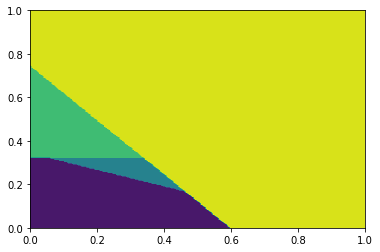

In [167]:
omega = np. zeros ([1 , 200 * 200])

for i in range(5):
    omhere = np.ones([1, 40000])
    for j in range(5):
        omhere[0,gconc[i]<gconc[j]] = 0
        omega[omhere == 1] = i + 1
    
omega = np.reshape(omega, [200, 200])

plt.contourf(x1,x2,omega)

(40000,)


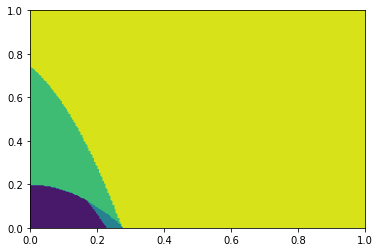

In [194]:
Ygrid2 = np.concatenate([Ygrid,(Ygrid[:,1]**2).reshape(-1,1)], axis = 1)

#print(Ygrid)
a1 = [1.3, -1, -3, -10]
a2 = [-1,1.5, 3, -1]
a3 = [0.4, -0.1, -0.1, 3]
a4 = [0.5, -1, 1, -0.1]
a5 = [-0.2, 1.5,-1, 0.4]

#g1 = LDF(Ygrid.T, a1, 0).reshape(-1,1)
#g2 = LDF(Ygrid.T, a2, 0).reshape(-1,1)
#g3 = LDF(Ygrid.T, a3, 0).reshape(-1,1)
#g4 = LDF(Ygrid.T, a4, 0).reshape(-1,1)
#g5 = LDF(Ygrid.T, a5, 0).reshape(-1,1)

g1 = np.matmul(a1, Ygrid2.T).reshape(-1,1)
g2 = np.matmul(a2, Ygrid2.T).reshape(-1,1)
g3 = np.matmul(a3, Ygrid2.T).reshape(-1,1)
g4 = np.matmul(a4, Ygrid2.T).reshape(-1,1) 
g5 = np.matmul(a5, Ygrid2.T).reshape(-1,1)
gconc = np.concatenate([g1, g2, g3, g4, g5], axis = 1)
gconc = gconc.T
print(gconc[0].shape)
gconc.shape

omega = np. zeros ([1 , 200 * 200])

for i in range(5):
    omhere = np.ones([1, 40000])
    for j in range(5):
        omhere[0,gconc[i]<gconc[j]] = 0
        omega[omhere == 1] = i + 1
    
omega = np.reshape(omega, [200, 200])

plt.contourf(x1,x2,omega)

# References

Have done this portion incorrectly, need to fix this! At least in the extension!